In [1]:
import nltk
from nltk.corpus import gutenberg
import string
import pandas as pd
import matplotlib.pyplot as plt
import pylab

# helper method to remove puncutation
table = string.maketrans("","")
def trans_punc(s):
    return s.translate(table, string.punctuation)

# Load in hamlet corpus
hammy_raw = gutenberg.words('shakespeare-hamlet.txt')

Now lets calculate the number of total words and the number of unique words in the corpus.

In [2]:
hammy_unique = set()
hammy_all_filtered = []
for w in hammy_raw:
    trans = trans_punc(str(w.lower()))
    # filter out empty strings
    if trans:
        hammy_unique.add(trans)
        hammy_all_filtered.append(trans)
print('Total Number of Words: %i' % len(hammy_all_filtered))

Total Number of Words: 30271


In [3]:
print('Number of Unique Words: %i' % len(hammy_unique))

Number of Unique Words: 4701


Now construct a word frequency dataframe using NLTK and Pandas.

In [4]:
fd = nltk.FreqDist([w.lower() for w in hammy_all_filtered])

# translate results into pandas dataframe
hammy_df = pd.DataFrame(fd.items(), columns=['Word', 'Frequency'])
hammy_df = hammy_df.sort(['Frequency'], ascending=[0])
hammy_df = hammy_df.head(200)

print hammy_df

          Word  Frequency
885        the        993
1684       and        863
2395        to        685
2197        of        610
4393         i        574
4463       you        527
2648         a        511
214         my        502
817         it        419
824         in        400
1654      that        377
910        ham        337
815         is        328
1520       not        300
2985       his        285
3729      this        276
4142      with        254
2230      your        253
4095       but        249
980        for        245
196         me        228
3311         d        223
3389      lord        211
2456      what        211
2298        as        205
4610        he        202
1250        be        192
1455        so        189
3002       him        178
4462      haue        178
...        ...        ...
3046    matter         26
1593     thing         25
3880       day         25
2112     world         25
193       hold         25
352          l         24
707     natu

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Plot the frequencies

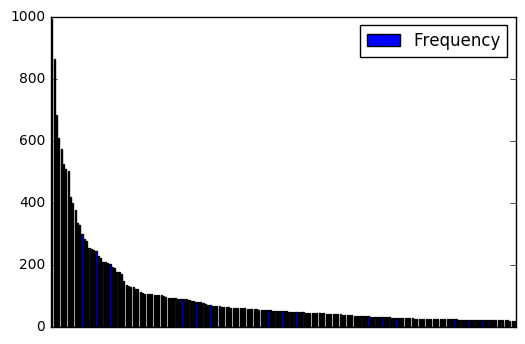

In [6]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)   # Hide Ticks
hammy_df.plot.bar(table=False, ax=ax)
plt.show()
plt.clf()

Determine how many words account for 50% of the total word count in the corpus:

In [7]:
hammy_df['CummSum'] = hammy_df['Frequency'].cumsum()
hammy_df['GtHalf'] = hammy_df['CummSum'] > (len(hammy_all_filtered) / 2.0)
hammy_df.index = range(1,len(hammy_df) + 1)

#print hammy_df

# find how many words sum to be half of the total words
half_point = hammy_df['GtHalf'] == True
print hammy_df[half_point].head(1)

    Word  Frequency  CummSum GtHalf
72  them         67    15181   True


72 Words account for 50% of the total word count

Does the corpus follow Zip's law?

The previous plot shows that it likely is a power law that defines the distribution.  Lets take a look at another plot:

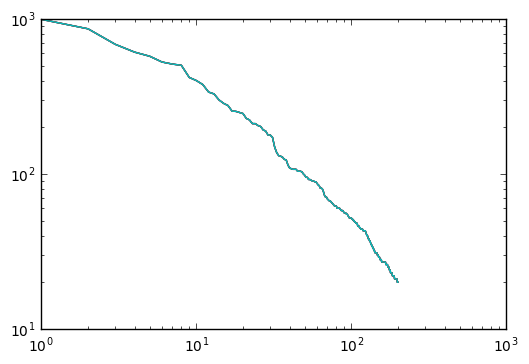

In [11]:
plt.loglog(hammy_df.index,hammy_df['Frequency'])
plt.show()

The above line is fairly linear indicating that the data is close to following Zipf's law.  Close enough not to reject the idea outright. 

The words in this corpus differ in two significant ways from "all words in all corpuses".  Firstly, the corpus is from hundreds of years ago.  The language was significantly different at that time and certainly the frequency of certain words differ from their usage today.  Considering there is far more text and therefore "words" from modern day than back in Shakespeare's time, this skews the usage here away from the average case.

Secondly, Shakespeare is a famous historical figure for his command and unique usage of the English language.  How he uses the language and his choice of vocabulary should not be considered average or typical.  